# Wordle – Client-Server version

> NOTE: Save this notebook under a new folder `Documents` > `html-lab-two`.

During our last web development lab, we [remade Wordle](https://github.com/ianfisk/teaching-materials/tree/main/wordle/part-one) by writing a **local HTML file** (_local_ meaning the file is saved to our computer's hard drive) and opening that local file in Chrome on our computers. Our Wordle file contained all the HTML, CSS (`<style>` elements), and JS (`<script>` elements) we needed, all in one file. Pretty cool! 

Now we're going to update our website to resemble a real internet site: **_A web page hosted on a web server and accessed over the internet._**

# Internet Architecture Review

## Client-Server 

Remember from the lesson that a simplified drawing of Internet architecture looks like this:

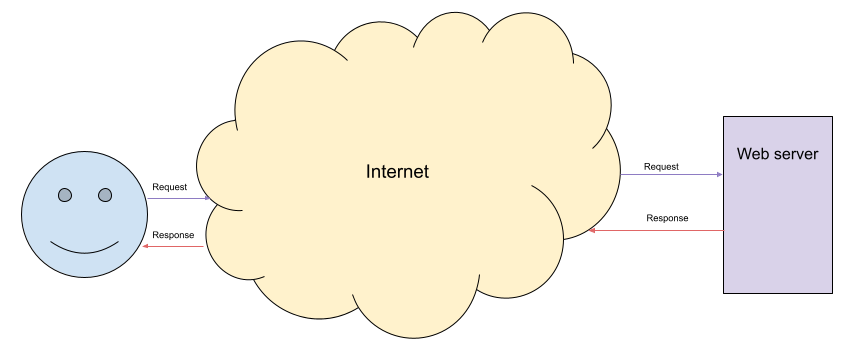

- The client (you/your computer) makes a request over the internet for a website
- The server that hosts the website looks at the request and sends a response containing the web page HTML back over the internet
- The client receives the response and renders the HTML

The same request-response model is then used to fetch all types of files need by the web page: separate JavaScript, CSS, and font files, images, videos, etc.

**Today we'll be updating our Wordle app to be served by a web server in this way over the internet. This will involve separating the HTML, CSS, and JavaScript into individual files, updating the HTML to request these separate files, and serving all these file from a web server.** Here is a slightly more detailed picture:

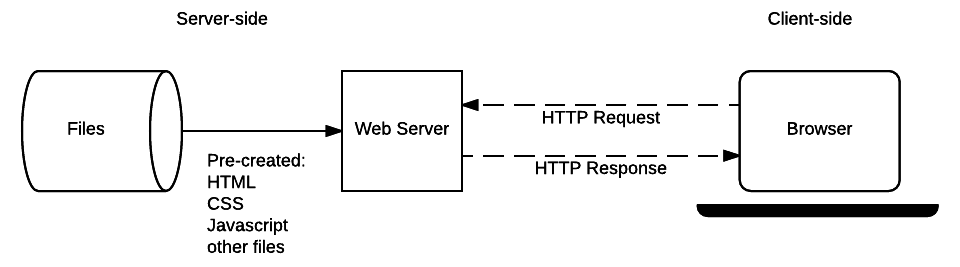

([src](https://developer.mozilla.org/en-US/docs/Learn/Server-side/First_steps/Client-Server_overview))

# 1) Separate JS, CSS, and HTML into individual files

> If you are stuck during these steps of opening and creating folders/files, refer back to [lab one's instructions](https://github.com/ianfisk/teaching-materials/tree/main/wordle/part-one#1-ive-created-some-html-to-get-you-started-but-we-need-to-save-it-to-your-computer). This is the same process, just different names for our new folder and file.

1. Find your `html-lab-one` folder where you saved your Wordle file on your local machine. I suggested saving the HTML here `Documents` > `html-lab-one` > `lab-one.html`. Open the `html-lab-one` **folder** in VS Code.

1. Make a **new** folder in your `Documents` folder to hold the products of this lab. Call it `html-lab-two` (you may have already done this step and saved this notebook file in this folder). So, the new folder will be `Documents` > `html-lab-two`

    I suggest doing this step in the Windows file explorer, and **then open the new folder in VS Code** by right clicking in the file explorer left pane > `Add Folder to Workspace...` > navigate to and click on the `html-lab-two` _folder_ > Open). In the end you want both folders open in VS Code:

   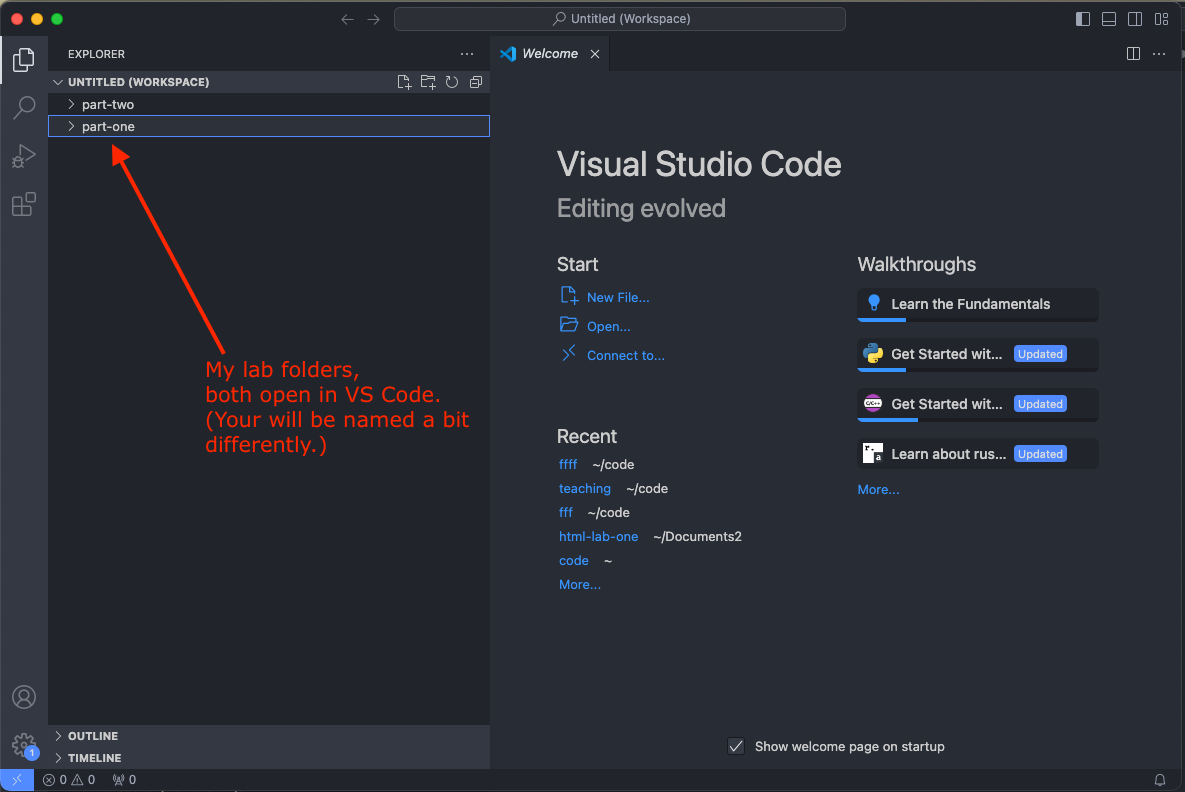

1. Create a blank HTML file named `index.html`. (So the full path will be `Documents` > `html-lab-two` > `index.html`.)

    **Why index.html?**

    The name `index.html` is a special name when it comes to web servers. If you go to `https://www.example.com/`, you're not actually specifying a specific file name to load (which would look something like `https://www.example.com/about.html`). Instead, the server will receive the request to just `https://www.example.com/` and by default serve any `index.html` file present from the directory the server is looking for files in.

1. Watch this [video](https://youtu.be/DscdXPBAda4) walking through copying your Wordle code to `index.html`, and then pulling out the JavaScript and CSS into their own respective files.

   [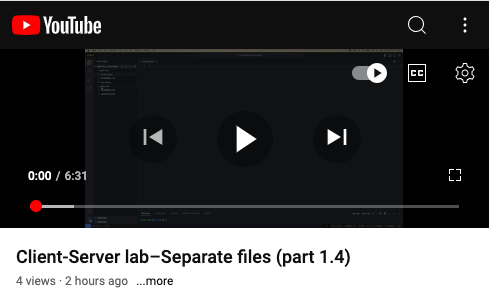](https://youtu.be/DscdXPBAda4)

> NOTE: We won't be testing what we've done immediately after the video, so once you complete all the steps in there, we'll work on the web server and come back to testing our separate HTML, JS, and CSS files after the server is started.


# 2) Start a web server in Python to serve the files from part 1, and request your Wordle from the server over the network

1. Create a Python script that uses the `SimpleHTTPRequestHandler` to start a server in the directory where our HTML, JS, and CSS files live.

    Python has a useful class, [SimpleHTTPRequestHandler](https://docs.python.org/3/library/http.server.html#http.server.SimpleHTTPRequestHandler), that can be used to start a web server that serves files from a given directory. The documentation states:

   >This class serves files from the directory directory and below, or the current directory if directory is not provided, directly mapping the directory structure to HTTP requests.

    This is exactly what we want to server our new Wordle `index.html` file. Perfect!

    Let's get started on our server by `import`ing some Python classes from the `http.server` module. You'll notice that I'm defining a few variables here that control our server: 
    
    - `PORT` is the port the server will be accessible on. This will show up in the URL, which will be `http://localhost:8080/`. Here is a picture breaking down the parts of a URL ([src](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/Web_mechanics/What_is_a_URL)):
    
        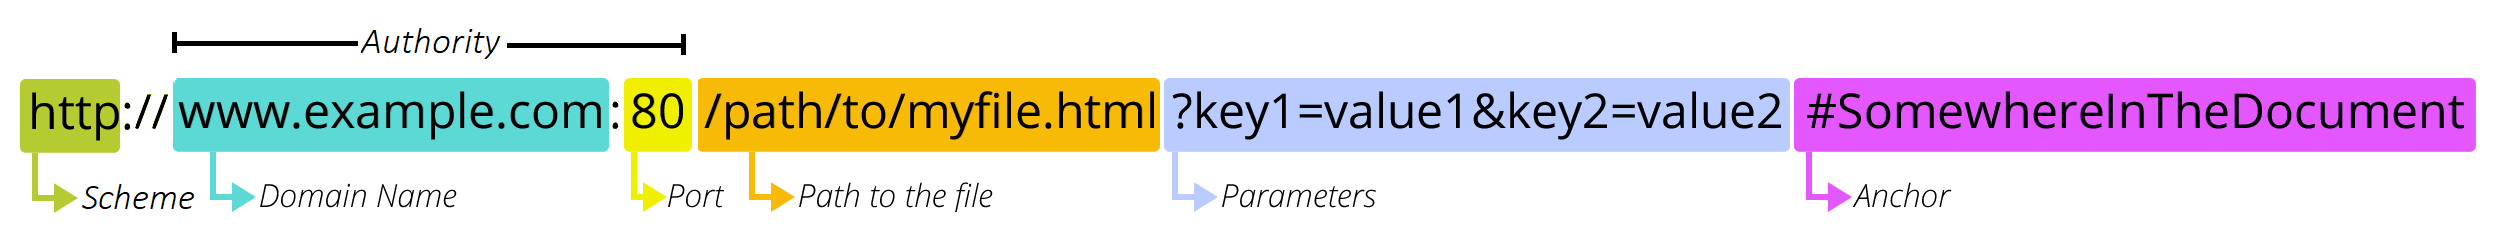
    
    - `SERVER_ADDRESS` is a [_tuple_](https://www.programiz.com/python-programming/tuple) in the form `(server_name, port)`. The server's name is unimportant, so it's an empty string.
    
    - `CODE_DIRECTORY` is the path to our `html-lab-two` folder that contains our new `index.html`, `js/main.js`, and `css/index.css` files.

In [ ]:
from http.server import SimpleHTTPRequestHandler, HTTPServer

PORT = 8080
SERVER_ADDRESS = ('', PORT)
CODE_DIRECTORY = 'C:\\Users\\<your_student_id>\\Documents\\html-lab-two'


2. Update the `CODE_DIRECTORY` variable in the above cell to have your correct student ID in the path, and **run the cell**.

    (Replace the entrie `<your_student_id>` bit with your ID. Also update the path to the folder you saved the `index.html` file in from above, if it's in a different location. Your final value should match your File Explorer path except here we have to _escape_ the backslashes by have `\\` instead of just `\`.)

3. Next I'll provide a small `class` that configures our web server to serve files from the `CODE_DIRECTORY` folder. **Run the following cell**:

In [ ]:
class MyRequestHandler(SimpleHTTPRequestHandler):
	def __init__(self, *args, **kwargs):
		super().__init__(*args, directory=CODE_DIRECTORY, **kwargs)

4. Now create an _instance_ of the `HTTPServer` class and start our server. Follow along [with this video](https://youtu.be/5Nzb02grT7k) and add your code to the below cell.

    [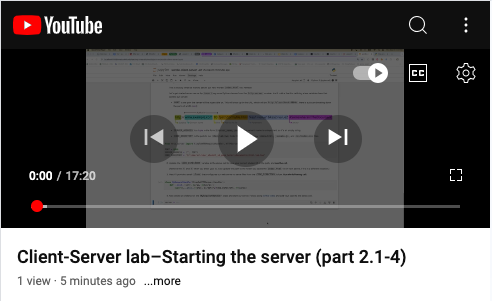](https://youtu.be/5Nzb02grT7k)

   And add your code below:

In [ ]:
server = ...

## Chrome Debugger – Using the Network tab

In the video I walk you through looking at the Chrome Debugger's Network tab to see **all the requests made by the web page while it is running**. This is an incredibly powerful debugging tool to use when developing a website, and it's also fun to poke around it to learn about how your favorite website works.

> TIP: Make sure the `Disable cache` checkbox is checked when developing a website so Chrome doesn't serve cached asset files when loading the page.

### Watch the video and record some metrics from the Network tab: ms to load JS/CSS

In the video I mentioned I want you to really poke around the Network tab and explore what's happening with the requests to our server made by Chrome. **Use the below cells to record some network metrics about your Wordle.**


In [ ]:
input("How many milliseconds does the request for your index.html take?")

In [ ]:
input("How many milliseconds does the request for your index.css take?")

In [ ]:
input("How many milliseconds does the request for your main.js take?")

In [ ]:
input("How many kilobytes (kB) is your main.js file?")

# 3) Request a classmate's website from their server over the network

1. Find your hostname

    You need to know your computer's [hostname](https://developer.mozilla.org/en-US/docs/Web/API/URL/hostname) before you can construct and share a URL with classmates so they can play your Wordle game over the network. To find this, you can use the `hostname` command in a Command Prompt window:

   - Open a new Command Prompt window: `⊞ Win` key > start typing `cmd` or `command prompt`
   - In the command prompt, type the `hostname` command and hit enter

    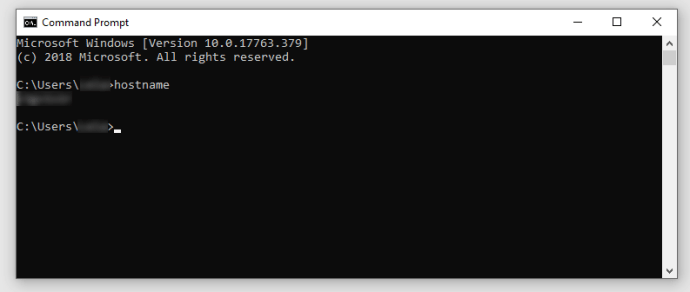

    - Now use your `hostname` to construct a URL to hit your Wordle game: `http://<your_hostname>:8080/`
  
        (Replace `<your_hostname>` with the command output)

In [ ]:
input("What is your network URL?")

2. Open a new chrome tab, open the Network debugger, and try using your new URL. Does it work? Do you see the HTML, JS, and CSS requests? Are the request timings different?

3. Share your URL with a friend and **have them play your Wordle game on _their_ computer**.

4. **Play someone elses Wordle game on your computer**. Are the request timings different this time? Why would they be, or maybe not be, very different?

    Here is an image represented our Local Area Network with all the computer lab machines requesting Wordle from each other:

   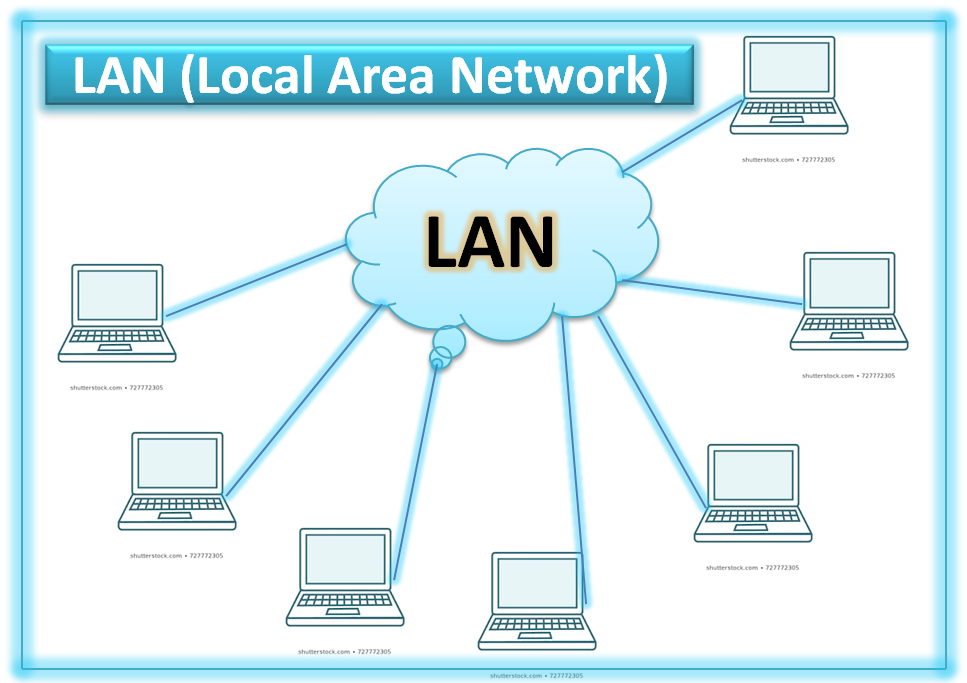

    Record some network timings below!

In [ ]:
input("How many milliseconds does the request for your friend's index.html take?")

In [ ]:
input("How many milliseconds does the request for your friend's index.css take?")

In [ ]:
input("How many milliseconds does the request for your friend's main.js take?")

# Summary

In this lab, we've transformed our single-file Wordle HTML into separate HTML, JS, and CSS files to replicate the setup of a modern website hosted on the internet. We've then started a local web server to serve our Wordle application in the same way any web server on the internet serves a website hosted on that server. Finally, we loaded each others' Wordle games over the local network. Success! 

Now you're basically ready to go home, set up your own server on a machine, and host your own web pages on that machine for the whole internet to see.

# SAVE YOUR NOTEBOOK with all the server code you wrote AND questions you've answered.